Car Price Prediction::
Download dataset from this link:

https://www.kaggle.com/hellbuoy/car-price-prediction

Problem Statement::
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car How well those variables describe the price of a car Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

task::
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

WORKFLOW ::
1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

4.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

5.Compilation Step (Note : Its a Regression problem , select loss , metrics according to it) 6.Train the Model with Epochs (100) and validate it

7.If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .

8.Evaluation Step

9.Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ls

 Volume in drive C has no label.
 Volume Serial Number is BC9B-4E79

 Directory of C:\Users\User\Downloads\Car Prices

04/04/2021  12:03 AM    <DIR>          .
04/04/2021  12:03 AM    <DIR>          ..
03/22/2021  09:08 AM    <DIR>          .ipynb_checkpoints
03/22/2021  09:14 AM    <DIR>          archive
03/21/2021  11:37 AM            18,523 archive.zip
04/04/2021  12:03 AM         1,131,365 Car Prices.ipynb
03/22/2021  09:08 AM                72 Untitled.ipynb
               3 File(s)      1,149,960 bytes
               4 Dir(s)  211,458,220,032 bytes free


In [3]:
cd archive

C:\Users\User\Downloads\Car Prices\archive


In [4]:
ls

 Volume in drive C has no label.
 Volume Serial Number is BC9B-4E79

 Directory of C:\Users\User\Downloads\Car Prices\archive

03/22/2021  09:14 AM    <DIR>          .
03/22/2021  09:14 AM    <DIR>          ..
10/15/2019  04:45 PM            26,717 CarPrice_Assignment.csv
10/15/2019  04:45 PM            14,884 Data Dictionary - carprices.xlsx
               2 File(s)         41,601 bytes
               2 Dir(s)  211,458,252,800 bytes free


In [5]:
dfcarprice = pd.read_csv('CarPrice_Assignment.csv')

In [6]:
dfcarprice

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [7]:
dfcarprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [8]:
dfcarprice.shape

(205, 26)

In [9]:
dfcarprice.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [10]:
dfcarprice.isnull().any()

car_ID              False
symboling           False
CarName             False
fueltype            False
aspiration          False
doornumber          False
carbody             False
drivewheel          False
enginelocation      False
wheelbase           False
carlength           False
carwidth            False
carheight           False
curbweight          False
enginetype          False
cylindernumber      False
enginesize          False
fuelsystem          False
boreratio           False
stroke              False
compressionratio    False
horsepower          False
peakrpm             False
citympg             False
highwaympg          False
price               False
dtype: bool

In [11]:
dfcarprice.CarName.unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [12]:
dfcarprice2 = dfcarprice.copy()

In [13]:
dfcarprice2[['CarMaker', 'CarSpec']] = dfcarprice2['CarName'].astype('string').str.split(" ",n = 1, expand = True).astype('object')

In [14]:
dfcarprice2.CarMaker.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [15]:
dfcarprice2.CarMaker.replace('toyouta', 'toyota', inplace = True)
dfcarprice2.CarMaker.replace('vokswagen', 'volkswagen', inplace = True)
dfcarprice2.CarMaker.replace('vw', 'volkswagen', inplace = True)
dfcarprice2.CarMaker.replace('porcshce', 'porsche', inplace = True)
dfcarprice2.CarMaker.replace('maxda', 'mazda', inplace = True)
dfcarprice2.CarMaker.replace('Nissan', 'nissan', inplace = True)


In [16]:
dfcarprice2.CarMaker.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [17]:
dfcarprice2.drop(['CarName','CarSpec'], axis = 1, inplace = True)

In [18]:
dfcarprice2.columns

Index(['car_ID', 'symboling', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'CarMaker'],
      dtype='object')

In [19]:
dfcarprice2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
labelencoder = LabelEncoder()

In [22]:
for i in dfcarprice2.select_dtypes('object').columns:
    dfcarprice2[i] = labelencoder.fit_transform(dfcarprice2[i])

In [23]:
"""
dfcarprice2.CarName = labelencoder.fit_transform(dfcarprice2.CarName)
dfcarprice2.fueltype  = labelencoder.fit_transform(dfcarprice2.fueltype)
dfcarprice2.aspiration  = labelencoder.fit_transform(dfcarprice2.aspiration)
dfcarprice2.doornumber  = labelencoder.fit_transform(dfcarprice2.doornumber)
dfcarprice2.carbody = labelencoder.fit_transform(dfcarprice2.carbody)
dfcarprice2.drivewheel = labelencoder.fit_transform(dfcarprice2.drivewheel)
dfcarprice2.enginelocation = labelencoder.fit_transform(dfcarprice2.enginelocation)
dfcarprice2.enginetype  = labelencoder.fit_transform(dfcarprice2.enginetype)
dfcarprice2.cylindernumber = labelencoder.fit_transform(dfcarprice2.cylindernumber)
dfcarprice2.fuelsystem = labelencoder.fit_transform(dfcarprice2.fuelsystem)
"""

'\ndfcarprice2.CarName = labelencoder.fit_transform(dfcarprice2.CarName)\ndfcarprice2.fueltype  = labelencoder.fit_transform(dfcarprice2.fueltype)\ndfcarprice2.aspiration  = labelencoder.fit_transform(dfcarprice2.aspiration)\ndfcarprice2.doornumber  = labelencoder.fit_transform(dfcarprice2.doornumber)\ndfcarprice2.carbody = labelencoder.fit_transform(dfcarprice2.carbody)\ndfcarprice2.drivewheel = labelencoder.fit_transform(dfcarprice2.drivewheel)\ndfcarprice2.enginelocation = labelencoder.fit_transform(dfcarprice2.enginelocation)\ndfcarprice2.enginetype  = labelencoder.fit_transform(dfcarprice2.enginetype)\ndfcarprice2.cylindernumber = labelencoder.fit_transform(dfcarprice2.cylindernumber)\ndfcarprice2.fuelsystem = labelencoder.fit_transform(dfcarprice2.fuelsystem)\n'

In [24]:
dfcarprice2.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarMaker
0,1,3,1,0,1,0,2,0,88.6,168.8,...,5,3.47,2.68,9.0,111,5000,21,27,13495.0,0
1,2,3,1,0,1,0,2,0,88.6,168.8,...,5,3.47,2.68,9.0,111,5000,21,27,16500.0,0
2,3,1,1,0,1,2,2,0,94.5,171.2,...,5,2.68,3.47,9.0,154,5000,19,26,16500.0,0
3,4,2,1,0,0,3,1,0,99.8,176.6,...,5,3.19,3.40,10.0,102,5500,24,30,13950.0,1
4,5,2,1,0,0,3,0,0,99.4,176.6,...,5,3.19,3.40,8.0,115,5500,18,22,17450.0,1


In [25]:
import seaborn as sns

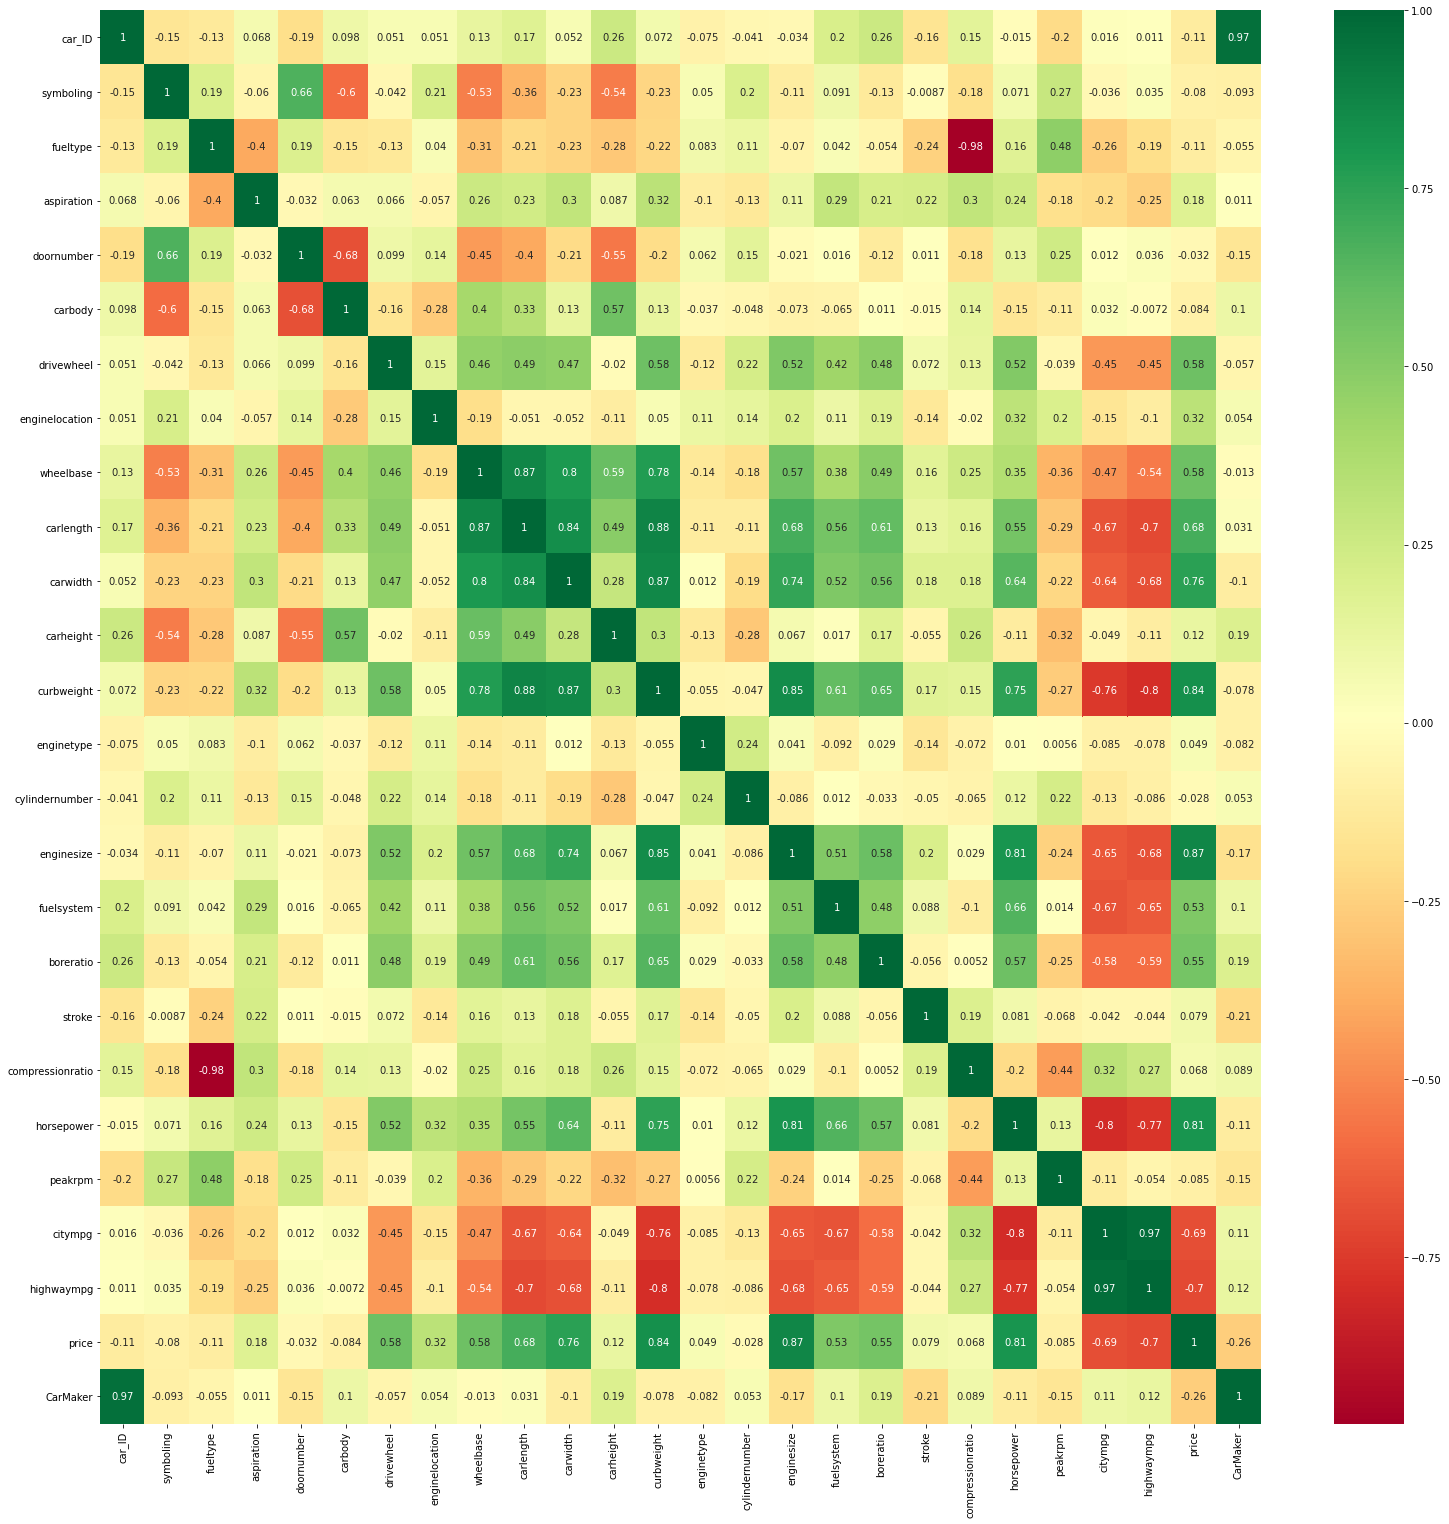

In [26]:
corrmat = dfcarprice2.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (26, 26))
g = sns.heatmap(dfcarprice2[top_corr_features].corr(), annot=True, cmap="RdYlGn")

In [27]:
corrmat

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarMaker
car_ID,1.000000,-0.151621,-0.125568,0.067729,-0.190352,0.098303,0.051406,0.051483,0.129729,0.170636,...,0.204898,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093,0.968701
symboling,-0.151621,1.000000,0.194311,-0.059866,0.664073,-0.596135,-0.041671,0.212471,-0.531954,-0.357612,...,0.091163,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978,-0.092793
fueltype,-0.125568,0.194311,1.000000,-0.401397,0.191491,-0.147853,-0.132257,0.040070,-0.308346,-0.212679,...,0.041529,-0.054451,-0.241829,-0.984356,0.163926,0.476883,-0.255963,-0.191392,-0.105679,-0.055049
aspiration,0.067729,-0.059866,-0.401397,1.000000,-0.031792,0.063028,0.066465,-0.057191,0.257611,0.234539,...,0.288086,0.212614,0.222982,0.295541,0.241685,-0.183383,-0.202362,-0.254416,0.177926,0.011326
doornumber,-0.190352,0.664073,0.191491,-0.031792,1.000000,-0.680358,0.098954,0.137757,-0.447357,-0.398568,...,0.015519,-0.119258,0.011082,-0.177888,0.126947,0.247668,0.012417,0.036330,-0.031835,-0.150465
carbody,0.098303,-0.596135,-0.147853,0.063028,-0.680358,1.000000,-0.155745,-0.277009,0.401362,0.334433,...,-0.065079,0.010549,-0.015325,0.136243,-0.153928,-0.109643,0.031697,-0.007170,-0.083976,0.101473
drivewheel,0.051406,-0.041671,-0.132257,0.066465,0.098954,-0.155745,1.000000,0.147865,0.459745,0.485649,...,0.424686,0.481827,0.071591,0.127479,0.518686,-0.039417,-0.449581,-0.452220,0.577992,-0.056639
enginelocation,0.051483,0.212471,0.040070,-0.057191,0.137757,-0.277009,0.147865,1.000000,-0.187790,-0.050989,...,0.105971,0.185042,-0.138455,-0.019762,0.317839,0.198461,-0.153487,-0.102026,0.324973,0.054410
wheelbase,0.129729,-0.531954,-0.308346,0.257611,-0.447357,0.401362,0.459745,-0.187790,1.000000,0.874587,...,0.384601,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816,-0.013288
carlength,0.170636,-0.357612,-0.212679,0.234539,-0.398568,0.334433,0.485649,-0.050989,0.874587,1.000000,...,0.557810,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920,0.030733


In [28]:
dfcarprice2.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarMaker
0,1,3,1,0,1,0,2,0,88.6,168.8,...,5,3.47,2.68,9.0,111,5000,21,27,13495.0,0
1,2,3,1,0,1,0,2,0,88.6,168.8,...,5,3.47,2.68,9.0,111,5000,21,27,16500.0,0
2,3,1,1,0,1,2,2,0,94.5,171.2,...,5,2.68,3.47,9.0,154,5000,19,26,16500.0,0
3,4,2,1,0,0,3,1,0,99.8,176.6,...,5,3.19,3.40,10.0,102,5500,24,30,13950.0,1
4,5,2,1,0,0,3,0,0,99.4,176.6,...,5,3.19,3.40,8.0,115,5500,18,22,17450.0,1


In [29]:
#sns.pairplot(dfcarprice2[['symboling', 'fueltype', 'aspiration', 'doornumber',
#       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
#       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
#       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
#       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'CarMaker']])

In [30]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [31]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(50, activation='relu', input_shape=(25,)))
    #model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(20, activation='relu'))
    #model.add(layers.Dense(6, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(loss='mse', metrics=['mae'], optimizer='adam') #rmsprop
    return model

In [32]:
from sklearn import preprocessing

In [33]:
carprices = dfcarprice2.price.values

In [34]:
#carfeatures = dfcarprice2.drop(['price'], axis = 1).values 

#carfeatures = preprocessing.normalize(dfcarprice2.drop(['price'], axis = 1).values, axis = 0)

#min_max_scaler = preprocessing.MinMaxScaler()
#carfeatures = min_max_scaler.fit_transform(dfcarprice2.drop(['price'], axis = 1).values)

standard_scaler = preprocessing.StandardScaler()
carfeatures = standard_scaler.fit_transform(dfcarprice2.drop(['price'], axis = 1).values)

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
carfeatures_trainval, carfeatures_test, carprices_trainval, carprices_test = train_test_split(carfeatures, carprices, test_size=0.3, random_state=42)

In [37]:
print(carfeatures_trainval.shape);
print(carfeatures_test.shape);
print(carprices_trainval.shape);
print(carprices_test.shape)

(143, 25)
(62, 25)
(143,)
(62,)


In [38]:
print(carfeatures_trainval)
print(carprices_trainval)

[[ 1.26736933 -1.47645244  0.32879797 ...  0.27282295  0.18178288
   1.08428363]
 [-0.45625296  0.133509    0.32879797 ... -0.95301169 -0.98276371
  -0.35079764]
 [ 1.21667456 -1.47645244 -3.04138127 ...  0.73251094  0.32735121
   1.08428363]
 ...
 [-0.16898258  0.133509    0.32879797 ...  0.88574028  0.9096245
  -0.03189069]
 [ 1.30116584  1.74347043  0.32879797 ... -0.95301169 -0.98276371
   1.08428363]
 [ 0.         -0.67147172  0.32879797 ... -1.25947035 -1.27390036
  -0.03189069]]
[11248.  16503.  10698.   6855.  20970.   7295.  22018.  10345.   6938.
 18150.   7603.   6095.  16695.   9538.  12945.  12764.   6669.   7957.
  7609.  18620.  16845.  18150.  16500.   6189.  11048.   7609.  34028.
  6989.   5118.   7295.  17075.  10595.   6377.  15510.  13845.   6529.
 16925.  18950.   8058.  17710.   8558.  32528.  15985.   7126.  17450.
  5399.  12440.   9495.  16630.   8013.  16430.  10245.   5572.   5348.
 11199.  13495.   7995.   7975.  31600.  22470.  11245.   8916.5  9298.
  892

In [39]:
carfeatures_trainval.max(axis = 0)

array([1.72362229, 1.74347043, 0.32879797, 2.13085442, 1.13038833,
       1.61656151, 1.21333041, 8.20568908, 2.80393159, 2.31984714,
       2.98705557, 2.49230162, 2.90798777, 2.83728893, 4.89126596,
       4.79267891, 1.86544089, 2.25863757, 2.92357458, 3.24491627,
       4.6614478 , 3.09964995, 1.95834559, 2.36530774, 1.40319058])

In [40]:
from sklearn.model_selection import RepeatedKFold

In [41]:
#kf = KFold(n_splits=3)
rkf = RepeatedKFold(n_splits=3, n_repeats=3)

In [42]:
all_scores = []

In [43]:
for train_index, test_index in rkf.split(carfeatures_trainval):
    #print("TRAIN:", train_index, "TEST:", test_index)
    carfeatures_trainval_train , carfeatures_trainval_test = carfeatures_trainval[train_index],carfeatures_trainval[test_index]
    carprices_trainval_train , carprices_trainval_test = carprices_trainval[train_index] , carprices_trainval[test_index]
    model = build_model()
    history = model.fit(carfeatures_trainval_train, carprices_trainval_train, epochs=500, batch_size=1)
    history_dict = history.history
    val_mse, val_mae = model.evaluate(carfeatures_trainval_test, carprices_trainval_test)
    all_scores.append(val_mae)

Epoch 1/500
95/95 [==============================] - 0s 467us/step - loss: 232518080.0000 - mae: 13159.5264
Epoch 2/500
95/95 [==============================] - 0s 408us/step - loss: 232369600.0000 - mae: 13155.0234
Epoch 3/500
95/95 [==============================] - 0s 423us/step - loss: 231884672.0000 - mae: 13139.7656
Epoch 4/500
95/95 [==============================] - 0s 420us/step - loss: 230512752.0000 - mae: 13101.6562
Epoch 5/500
95/95 [==============================] - 0s 409us/step - loss: 227605824.0000 - mae: 13022.1924
Epoch 6/500
95/95 [==============================] - 0s 480us/step - loss: 223013552.0000 - mae: 12883.6924
Epoch 7/500
95/95 [==============================] - 0s 556us/step - loss: 216290400.0000 - mae: 12692.6934
Epoch 8/500
95/95 [==============================] - 0s 467us/step - loss: 207140240.0000 - mae: 12428.9160
Epoch 9/500
95/95 [==============================] - 0s 537us/step - loss: 196091584.0000 - mae: 12090.7656 0s - loss: 196091584.0000 - 

95/95 [==============================] - 0s 242us/step - loss: 5840173.0000 - mae: 1813.2872
Epoch 78/500
95/95 [==============================] - 0s 369us/step - loss: 5770692.0000 - mae: 1811.7357
Epoch 79/500
95/95 [==============================] - 0s 508us/step - loss: 5710109.5000 - mae: 1804.7222
Epoch 80/500
95/95 [==============================] - 0s 372us/step - loss: 5633554.5000 - mae: 1788.5728
Epoch 81/500
95/95 [==============================] - 0s 422us/step - loss: 5526334.5000 - mae: 1780.9154
Epoch 82/500
95/95 [==============================] - 0s 347us/step - loss: 5460911.0000 - mae: 1769.3313
Epoch 83/500
95/95 [==============================] - 0s 348us/step - loss: 5422663.0000 - mae: 1772.7269
Epoch 84/500
95/95 [==============================] - 0s 427us/step - loss: 5311962.5000 - mae: 1746.9380
Epoch 85/500
95/95 [==============================] - 0s 539us/step - loss: 5240341.5000 - mae: 1737.6848
Epoch 86/500
95/95 [==============================] - 0s 47

95/95 [==============================] - 0s 523us/step - loss: 2934343.7500 - mae: 1250.6497
Epoch 154/500
95/95 [==============================] - 0s 404us/step - loss: 2917162.0000 - mae: 1238.1169
Epoch 155/500
95/95 [==============================] - 0s 395us/step - loss: 2912536.5000 - mae: 1231.5226
Epoch 156/500
95/95 [==============================] - 0s 404us/step - loss: 2902944.7500 - mae: 1235.6080
Epoch 157/500
95/95 [==============================] - 0s 367us/step - loss: 2882035.7500 - mae: 1222.6100
Epoch 158/500
95/95 [==============================] - 0s 378us/step - loss: 2884969.7500 - mae: 1230.7358
Epoch 159/500
95/95 [==============================] - 0s 378us/step - loss: 2845191.5000 - mae: 1220.5476
Epoch 160/500
95/95 [==============================] - 0s 410us/step - loss: 2824330.7500 - mae: 1210.1429
Epoch 161/500
95/95 [==============================] - 0s 455us/step - loss: 2819948.2500 - mae: 1208.6471
Epoch 162/500
95/95 [==============================

95/95 [==============================] - 0s 401us/step - loss: 2068658.7500 - mae: 997.6517
Epoch 230/500
95/95 [==============================] - 0s 426us/step - loss: 2049285.2500 - mae: 999.5753
Epoch 231/500
95/95 [==============================] - 0s 363us/step - loss: 2038006.6250 - mae: 994.4957
Epoch 232/500
95/95 [==============================] - 0s 394us/step - loss: 2053282.7500 - mae: 1000.4755
Epoch 233/500
95/95 [==============================] - 0s 385us/step - loss: 2032743.1250 - mae: 995.0180
Epoch 234/500
95/95 [==============================] - 0s 446us/step - loss: 2018135.8750 - mae: 996.2690
Epoch 235/500
95/95 [==============================] - 0s 356us/step - loss: 1995684.3750 - mae: 983.9595
Epoch 236/500
95/95 [==============================] - 0s 372us/step - loss: 1994123.0000 - mae: 994.0201
Epoch 237/500
95/95 [==============================] - 0s 353us/step - loss: 1979690.2500 - mae: 980.4950
Epoch 238/500
95/95 [==============================] - 0s 4

Epoch 306/500
95/95 [==============================] - 0s 572us/step - loss: 1515727.3750 - mae: 853.6847
Epoch 307/500
95/95 [==============================] - 0s 544us/step - loss: 1537048.3750 - mae: 861.3553
Epoch 308/500
95/95 [==============================] - 0s 665us/step - loss: 1505282.5000 - mae: 856.0544
Epoch 309/500
95/95 [==============================] - 0s 609us/step - loss: 1497950.3750 - mae: 855.3806
Epoch 310/500
95/95 [==============================] - 0s 588us/step - loss: 1507391.3750 - mae: 858.6437
Epoch 311/500
95/95 [==============================] - 0s 504us/step - loss: 1496041.3750 - mae: 847.5242
Epoch 312/500
95/95 [==============================] - 0s 556us/step - loss: 1468558.0000 - mae: 844.7745
Epoch 313/500
95/95 [==============================] - 0s 483us/step - loss: 1484329.8750 - mae: 843.5698
Epoch 314/500
95/95 [==============================] - 0s 504us/step - loss: 1493131.5000 - mae: 853.0390
Epoch 315/500
95/95 [=========================

95/95 [==============================] - 0s 609us/step - loss: 1182421.5000 - mae: 755.5264
Epoch 384/500
95/95 [==============================] - 0s 577us/step - loss: 1158602.6250 - mae: 740.5541
Epoch 385/500
95/95 [==============================] - 0s 703us/step - loss: 1149158.6250 - mae: 744.7647
Epoch 386/500
95/95 [==============================] - 0s 598us/step - loss: 1158579.2500 - mae: 739.6157
Epoch 387/500
95/95 [==============================] - 0s 630us/step - loss: 1170095.8750 - mae: 748.5355
Epoch 388/500
95/95 [==============================] - 0s 567us/step - loss: 1161673.3750 - mae: 736.7753
Epoch 389/500
95/95 [==============================] - 0s 546us/step - loss: 1151406.2500 - mae: 748.3084
Epoch 390/500
95/95 [==============================] - 0s 504us/step - loss: 1127377.6250 - mae: 735.2372
Epoch 391/500
95/95 [==============================] - 0s 546us/step - loss: 1131363.7500 - mae: 737.3033
Epoch 392/500
95/95 [==============================] - ETA: 

95/95 [==============================] - 0s 525us/step - loss: 927052.1875 - mae: 653.5060
Epoch 461/500
95/95 [==============================] - 0s 556us/step - loss: 924992.4375 - mae: 652.4596
Epoch 462/500
95/95 [==============================] - 0s 567us/step - loss: 923546.9375 - mae: 656.6299
Epoch 463/500
95/95 [==============================] - 0s 567us/step - loss: 920169.2500 - mae: 648.4103
Epoch 464/500
95/95 [==============================] - 0s 556us/step - loss: 920961.9375 - mae: 657.0312
Epoch 465/500
95/95 [==============================] - 0s 567us/step - loss: 912932.5625 - mae: 643.8821
Epoch 466/500
95/95 [==============================] - 0s 588us/step - loss: 911053.8125 - mae: 658.7998
Epoch 467/500
95/95 [==============================] - 0s 525us/step - loss: 898680.0625 - mae: 651.6437
Epoch 468/500
95/95 [==============================] - 0s 468us/step - loss: 903619.1875 - mae: 641.8214
Epoch 469/500
95/95 [==============================] - 0s 620us/step 

95/95 [==============================] - 0s 565us/step - loss: 15348616.0000 - mae: 3116.1763
Epoch 37/500
95/95 [==============================] - 0s 389us/step - loss: 14909044.0000 - mae: 3060.6660
Epoch 38/500
95/95 [==============================] - 0s 396us/step - loss: 14399495.0000 - mae: 3006.2205
Epoch 39/500
95/95 [==============================] - 0s 450us/step - loss: 14013638.0000 - mae: 2962.4253
Epoch 40/500
95/95 [==============================] - 0s 432us/step - loss: 13607382.0000 - mae: 2914.5144
Epoch 41/500
95/95 [==============================] - 0s 362us/step - loss: 13273926.0000 - mae: 2886.0830
Epoch 42/500
95/95 [==============================] - 0s 500us/step - loss: 12901897.0000 - mae: 2829.1182
Epoch 43/500
95/95 [==============================] - 0s 502us/step - loss: 12553834.0000 - mae: 2795.6582
Epoch 44/500
95/95 [==============================] - 0s 486us/step - loss: 12230362.0000 - mae: 2761.8918
Epoch 45/500
95/95 [==============================

95/95 [==============================] - 0s 615us/step - loss: 4249084.5000 - mae: 1595.2866
Epoch 114/500
95/95 [==============================] - 0s 406us/step - loss: 4257475.5000 - mae: 1592.1440
Epoch 115/500
95/95 [==============================] - 0s 718us/step - loss: 4247372.5000 - mae: 1587.3424
Epoch 116/500
95/95 [==============================] - 0s 483us/step - loss: 4214631.5000 - mae: 1586.0919
Epoch 117/500
95/95 [==============================] - 0s 405us/step - loss: 4198180.5000 - mae: 1577.7419
Epoch 118/500
95/95 [==============================] - 0s 381us/step - loss: 4208873.0000 - mae: 1584.7363
Epoch 119/500
95/95 [==============================] - 0s 727us/step - loss: 4117521.2500 - mae: 1558.4409
Epoch 120/500
95/95 [==============================] - 0s 597us/step - loss: 4115580.7500 - mae: 1567.0533
Epoch 121/500
95/95 [==============================] - 0s 596us/step - loss: 4044873.7500 - mae: 1552.3347
Epoch 122/500
95/95 [==============================

95/95 [==============================] - 0s 450us/step - loss: 2859850.7500 - mae: 1291.9052
Epoch 190/500
95/95 [==============================] - 0s 472us/step - loss: 2854770.7500 - mae: 1291.2471
Epoch 191/500
95/95 [==============================] - 0s 481us/step - loss: 2829718.5000 - mae: 1283.0276
Epoch 192/500
95/95 [==============================] - 0s 375us/step - loss: 2826680.0000 - mae: 1284.7666
Epoch 193/500
95/95 [==============================] - 0s 546us/step - loss: 2837616.2500 - mae: 1280.5372
Epoch 194/500
95/95 [==============================] - 0s 350us/step - loss: 2799582.7500 - mae: 1276.2874
Epoch 195/500
95/95 [==============================] - 0s 346us/step - loss: 2789345.7500 - mae: 1277.3749
Epoch 196/500
95/95 [==============================] - 0s 347us/step - loss: 2799619.2500 - mae: 1271.9772
Epoch 197/500
95/95 [==============================] - 0s 511us/step - loss: 2764120.2500 - mae: 1272.0198
Epoch 198/500
95/95 [==============================

Epoch 265/500
95/95 [==============================] - 0s 420us/step - loss: 2198221.5000 - mae: 1130.8214
Epoch 266/500
95/95 [==============================] - 0s 448us/step - loss: 2188704.7500 - mae: 1126.4771
Epoch 267/500
95/95 [==============================] - 0s 464us/step - loss: 2166264.2500 - mae: 1127.2264
Epoch 268/500
95/95 [==============================] - 0s 336us/step - loss: 2172076.2500 - mae: 1122.1909
Epoch 269/500
95/95 [==============================] - 0s 554us/step - loss: 2160312.0000 - mae: 1120.6466
Epoch 270/500
95/95 [==============================] - 0s 438us/step - loss: 2187435.5000 - mae: 1135.1600
Epoch 271/500
95/95 [==============================] - 0s 575us/step - loss: 2155961.0000 - mae: 1122.6591
Epoch 272/500
95/95 [==============================] - 0s 422us/step - loss: 2167154.7500 - mae: 1115.2307
Epoch 273/500
95/95 [==============================] - 0s 440us/step - loss: 2135192.2500 - mae: 1115.7399
Epoch 274/500
95/95 [================

95/95 [==============================] - 0s 503us/step - loss: 1775212.1250 - mae: 1022.0369
Epoch 342/500
95/95 [==============================] - 0s 495us/step - loss: 1781682.3750 - mae: 1018.4328
Epoch 343/500
95/95 [==============================] - 0s 517us/step - loss: 1776629.8750 - mae: 1024.0079
Epoch 344/500
95/95 [==============================] - 0s 525us/step - loss: 1776361.8750 - mae: 1021.4472
Epoch 345/500
95/95 [==============================] - 0s 538us/step - loss: 1773854.1250 - mae: 1015.3010
Epoch 346/500
95/95 [==============================] - 0s 458us/step - loss: 1769854.3750 - mae: 1020.3339
Epoch 347/500
95/95 [==============================] - 0s 451us/step - loss: 1760025.8750 - mae: 1016.3386
Epoch 348/500
95/95 [==============================] - 0s 472us/step - loss: 1764555.0000 - mae: 1018.8172
Epoch 349/500
95/95 [==============================] - 0s 441us/step - loss: 1736569.2500 - mae: 1008.6315
Epoch 350/500
95/95 [==============================

95/95 [==============================] - 0s 556us/step - loss: 1462355.5000 - mae: 926.8783
Epoch 419/500
95/95 [==============================] - 0s 588us/step - loss: 1441610.1250 - mae: 929.4691
Epoch 420/500
95/95 [==============================] - 0s 535us/step - loss: 1452127.3750 - mae: 923.3705
Epoch 421/500
95/95 [==============================] - 0s 567us/step - loss: 1459079.1250 - mae: 920.1676
Epoch 422/500
95/95 [==============================] - 0s 567us/step - loss: 1435403.0000 - mae: 930.8283
Epoch 423/500
95/95 [==============================] - 0s 576us/step - loss: 1428399.0000 - mae: 920.9953
Epoch 424/500
95/95 [==============================] - 0s 661us/step - loss: 1439662.3750 - mae: 918.1437
Epoch 425/500
95/95 [==============================] - 0s 567us/step - loss: 1412596.2500 - mae: 920.8226
Epoch 426/500
95/95 [==============================] - 0s 508us/step - loss: 1413943.2500 - mae: 911.2424
Epoch 427/500
95/95 [==============================] - 0s 47

95/95 [==============================] - 0s 682us/step - loss: 1165161.2500 - mae: 835.2975
Epoch 496/500
95/95 [==============================] - 0s 619us/step - loss: 1156398.6250 - mae: 832.6281
Epoch 497/500
95/95 [==============================] - 0s 546us/step - loss: 1163098.1250 - mae: 829.4745
Epoch 498/500
95/95 [==============================] - 0s 620us/step - loss: 1152190.1250 - mae: 827.3312
Epoch 499/500
95/95 [==============================] - 0s 525us/step - loss: 1156163.1250 - mae: 833.8257
Epoch 500/500
2/2 [==============================] - 0s 999us/step - loss: 6243469.5000 - mae: 1858.3258
Epoch 1/500
96/96 [==============================] - 0s 465us/step - loss: 237032000.0000 - mae: 13405.3994
Epoch 2/500
96/96 [==============================] - 0s 494us/step - loss: 236724976.0000 - mae: 13395.6846
Epoch 3/500
96/96 [==============================] - 0s 547us/step - loss: 235683392.0000 - mae: 13363.6670
Epoch 4/500
96/96 [==============================] - 0s

96/96 [==============================] - 0s 524us/step - loss: 4873712.5000 - mae: 1610.0917
Epoch 71/500
96/96 [==============================] - 0s 506us/step - loss: 4819439.5000 - mae: 1610.2416
Epoch 72/500
96/96 [==============================] - 0s 486us/step - loss: 4784942.0000 - mae: 1598.7887
Epoch 73/500
96/96 [==============================] - 0s 545us/step - loss: 4761969.5000 - mae: 1590.5900
Epoch 74/500
96/96 [==============================] - 0s 504us/step - loss: 4666401.0000 - mae: 1574.7222
Epoch 75/500
96/96 [==============================] - 0s 542us/step - loss: 4642390.5000 - mae: 1568.3920
Epoch 76/500
96/96 [==============================] - 0s 593us/step - loss: 4569609.0000 - mae: 1558.7848
Epoch 77/500
96/96 [==============================] - 0s 561us/step - loss: 4545535.5000 - mae: 1557.0996
Epoch 78/500
96/96 [==============================] - 0s 543us/step - loss: 4460669.5000 - mae: 1539.1769
Epoch 79/500
96/96 [==============================] - 0s 55

Epoch 147/500
96/96 [==============================] - 0s 549us/step - loss: 2814796.0000 - mae: 1189.4010
Epoch 148/500
96/96 [==============================] - 0s 528us/step - loss: 2815687.2500 - mae: 1195.7878
Epoch 149/500
96/96 [==============================] - 0s 503us/step - loss: 2809931.2500 - mae: 1190.6769
Epoch 150/500
96/96 [==============================] - 0s 584us/step - loss: 2831934.2500 - mae: 1197.0638
Epoch 151/500
96/96 [==============================] - 0s 533us/step - loss: 2785566.7500 - mae: 1179.4686
Epoch 152/500
96/96 [==============================] - 0s 457us/step - loss: 2778773.7500 - mae: 1196.9615
Epoch 153/500
96/96 [==============================] - 0s 501us/step - loss: 2708237.0000 - mae: 1169.0914
Epoch 154/500
96/96 [==============================] - 0s 472us/step - loss: 2763124.2500 - mae: 1179.8080
Epoch 155/500
96/96 [==============================] - 0s 504us/step - loss: 2748054.0000 - mae: 1164.6840
Epoch 156/500
96/96 [================

96/96 [==============================] - 0s 547us/step - loss: 2007541.1250 - mae: 1025.2692
Epoch 224/500
96/96 [==============================] - 0s 616us/step - loss: 1955080.5000 - mae: 1015.1730
Epoch 225/500
96/96 [==============================] - 0s 634us/step - loss: 1949006.6250 - mae: 1014.5026
Epoch 226/500
96/96 [==============================] - 0s 654us/step - loss: 1999682.5000 - mae: 1021.3257
Epoch 227/500
96/96 [==============================] - 0s 717us/step - loss: 1949041.6250 - mae: 1004.7185
Epoch 228/500
96/96 [==============================] - 0s 602us/step - loss: 1940799.3750 - mae: 1014.0292
Epoch 229/500
96/96 [==============================] - 0s 612us/step - loss: 1932447.0000 - mae: 1004.0214
Epoch 230/500
96/96 [==============================] - 0s 543us/step - loss: 1957574.6250 - mae: 1016.7641
Epoch 231/500
96/96 [==============================] - 0s 512us/step - loss: 1943869.3750 - mae: 1013.4240
Epoch 232/500
96/96 [==============================

96/96 [==============================] - 0s 456us/step - loss: 1494913.1250 - mae: 883.2788
Epoch 301/500
96/96 [==============================] - 0s 498us/step - loss: 1474796.6250 - mae: 892.6094
Epoch 302/500
96/96 [==============================] - 0s 538us/step - loss: 1461590.3750 - mae: 888.3704
Epoch 303/500
96/96 [==============================] - 0s 544us/step - loss: 1444140.6250 - mae: 885.0633
Epoch 304/500
96/96 [==============================] - 0s 460us/step - loss: 1452291.8750 - mae: 881.0966
Epoch 305/500
96/96 [==============================] - 0s 450us/step - loss: 1442104.0000 - mae: 890.3358
Epoch 306/500
96/96 [==============================] - 0s 473us/step - loss: 1446365.0000 - mae: 877.8544
Epoch 307/500
96/96 [==============================] - 0s 504us/step - loss: 1473866.0000 - mae: 889.1014
Epoch 308/500
96/96 [==============================] - 0s 452us/step - loss: 1427080.5000 - mae: 884.3355
Epoch 309/500
96/96 [==============================] - 0s 46

96/96 [==============================] - 0s 500us/step - loss: 1118785.1250 - mae: 786.4414
Epoch 378/500
96/96 [==============================] - 0s 606us/step - loss: 1101788.8750 - mae: 773.4534
Epoch 379/500
96/96 [==============================] - 0s 587us/step - loss: 1097296.1250 - mae: 770.9161
Epoch 380/500
96/96 [==============================] - 0s 599us/step - loss: 1118040.6250 - mae: 764.6465
Epoch 381/500
96/96 [==============================] - 0s 622us/step - loss: 1089749.3750 - mae: 764.4233
Epoch 382/500
96/96 [==============================] - 0s 568us/step - loss: 1102233.7500 - mae: 779.6146
Epoch 383/500
96/96 [==============================] - 0s 539us/step - loss: 1081395.8750 - mae: 767.5919
Epoch 384/500
96/96 [==============================] - 0s 507us/step - loss: 1088831.8750 - mae: 770.6313
Epoch 385/500
96/96 [==============================] - 0s 482us/step - loss: 1117300.8750 - mae: 773.9236
Epoch 386/500
96/96 [==============================] - 0s 47

96/96 [==============================] - 0s 555us/step - loss: 851995.0625 - mae: 675.8746
Epoch 455/500
96/96 [==============================] - 0s 495us/step - loss: 838883.5625 - mae: 671.7540
Epoch 456/500
96/96 [==============================] - 0s 511us/step - loss: 850640.4375 - mae: 675.5442
Epoch 457/500
96/96 [==============================] - 0s 532us/step - loss: 837737.7500 - mae: 670.2957
Epoch 458/500
96/96 [==============================] - 0s 517us/step - loss: 845544.3125 - mae: 675.2507
Epoch 459/500
96/96 [==============================] - 0s 534us/step - loss: 838770.5625 - mae: 665.8437
Epoch 460/500
96/96 [==============================] - 0s 561us/step - loss: 830848.1875 - mae: 660.9600
Epoch 461/500
96/96 [==============================] - 0s 548us/step - loss: 818679.5625 - mae: 664.1179
Epoch 462/500
96/96 [==============================] - 0s 485us/step - loss: 829396.9375 - mae: 660.9564
Epoch 463/500
96/96 [==============================] - 0s 583us/step 

95/95 [==============================] - 0s 628us/step - loss: 13484919.0000 - mae: 2798.3440
Epoch 31/500
95/95 [==============================] - 0s 610us/step - loss: 12837839.0000 - mae: 2764.2996
Epoch 32/500
95/95 [==============================] - 0s 547us/step - loss: 12307395.0000 - mae: 2711.7256
Epoch 33/500
95/95 [==============================] - 0s 551us/step - loss: 11704595.0000 - mae: 2653.5361
Epoch 34/500
95/95 [==============================] - 0s 531us/step - loss: 11215621.0000 - mae: 2592.7954
Epoch 35/500
95/95 [==============================] - 0s 552us/step - loss: 10751863.0000 - mae: 2547.3862
Epoch 36/500
95/95 [==============================] - 0s 542us/step - loss: 10326797.0000 - mae: 2501.3677
Epoch 37/500
95/95 [==============================] - 0s 587us/step - loss: 9953265.0000 - mae: 2451.6111
Epoch 38/500
95/95 [==============================] - 0s 651us/step - loss: 9585290.0000 - mae: 2402.7505
Epoch 39/500
95/95 [==============================] 

95/95 [==============================] - 0s 572us/step - loss: 3060587.7500 - mae: 1295.6189
Epoch 108/500
95/95 [==============================] - 0s 578us/step - loss: 3035711.2500 - mae: 1277.0815
Epoch 109/500
95/95 [==============================] - 0s 562us/step - loss: 3027608.2500 - mae: 1275.9115
Epoch 110/500
95/95 [==============================] - 0s 509us/step - loss: 2985748.5000 - mae: 1278.7196
Epoch 111/500
95/95 [==============================] - 0s 472us/step - loss: 2981365.2500 - mae: 1280.2092
Epoch 112/500
95/95 [==============================] - 0s 490us/step - loss: 2931621.5000 - mae: 1263.4926
Epoch 113/500
95/95 [==============================] - 0s 534us/step - loss: 2937583.7500 - mae: 1264.3054
Epoch 114/500
95/95 [==============================] - 0s 671us/step - loss: 2898352.5000 - mae: 1264.5549
Epoch 115/500
95/95 [==============================] - 0s 590us/step - loss: 2898696.7500 - mae: 1259.2250
Epoch 116/500
95/95 [==============================

95/95 [==============================] - 0s 527us/step - loss: 1988453.5000 - mae: 1039.5372
Epoch 184/500
95/95 [==============================] - 0s 515us/step - loss: 2008480.8750 - mae: 1052.2676
Epoch 185/500
95/95 [==============================] - 0s 490us/step - loss: 1972563.3750 - mae: 1041.4001
Epoch 186/500
95/95 [==============================] - 0s 511us/step - loss: 1966636.6250 - mae: 1032.9165
Epoch 187/500
95/95 [==============================] - 0s 546us/step - loss: 1943856.5000 - mae: 1029.7732
Epoch 188/500
95/95 [==============================] - 0s 604us/step - loss: 1968804.7500 - mae: 1039.2252
Epoch 189/500
95/95 [==============================] - 0s 561us/step - loss: 1945119.3750 - mae: 1031.2637
Epoch 190/500
95/95 [==============================] - 0s 608us/step - loss: 1929232.3750 - mae: 1036.1436
Epoch 191/500
95/95 [==============================] - 0s 598us/step - loss: 1915155.0000 - mae: 1027.1230
Epoch 192/500
95/95 [==============================

95/95 [==============================] - 0s 530us/step - loss: 1477094.6250 - mae: 913.4668
Epoch 260/500
95/95 [==============================] - 0s 577us/step - loss: 1457200.3750 - mae: 914.9415
Epoch 261/500
95/95 [==============================] - 0s 608us/step - loss: 1450922.2500 - mae: 910.1313
Epoch 262/500
95/95 [==============================] - 0s 571us/step - loss: 1466083.8750 - mae: 922.1034
Epoch 263/500
95/95 [==============================] - 0s 561us/step - loss: 1471589.5000 - mae: 904.0391
Epoch 264/500
95/95 [==============================] - 0s 510us/step - loss: 1466176.0000 - mae: 917.6856
Epoch 265/500
95/95 [==============================] - 0s 519us/step - loss: 1445121.3750 - mae: 909.9609
Epoch 266/500
95/95 [==============================] - 0s 538us/step - loss: 1451745.1250 - mae: 916.0061
Epoch 267/500
95/95 [==============================] - 0s 651us/step - loss: 1433159.7500 - mae: 907.5599
Epoch 268/500
95/95 [==============================] - 0s 42

95/95 [==============================] - 0s 568us/step - loss: 1119756.2500 - mae: 804.8506
Epoch 337/500
95/95 [==============================] - 0s 571us/step - loss: 1117799.8750 - mae: 813.0824
Epoch 338/500
95/95 [==============================] - 0s 573us/step - loss: 1109233.2500 - mae: 807.2775
Epoch 339/500
95/95 [==============================] - 0s 676us/step - loss: 1107347.8750 - mae: 805.2656
Epoch 340/500
95/95 [==============================] - 0s 610us/step - loss: 1102073.8750 - mae: 811.9469
Epoch 341/500
95/95 [==============================] - 0s 598us/step - loss: 1111148.1250 - mae: 802.6711
Epoch 342/500
95/95 [==============================] - 0s 524us/step - loss: 1110667.6250 - mae: 812.9900
Epoch 343/500
95/95 [==============================] - 0s 511us/step - loss: 1108503.3750 - mae: 805.9915
Epoch 344/500
95/95 [==============================] - 0s 539us/step - loss: 1081432.6250 - mae: 801.7923
Epoch 345/500
95/95 [==============================] - 0s 50

95/95 [==============================] - 0s 451us/step - loss: 882466.4375 - mae: 724.8279
Epoch 414/500
95/95 [==============================] - 0s 424us/step - loss: 897146.4375 - mae: 729.0557
Epoch 415/500
95/95 [==============================] - 0s 418us/step - loss: 897729.6875 - mae: 723.6996
Epoch 416/500
95/95 [==============================] - 0s 456us/step - loss: 874064.5000 - mae: 719.5342
Epoch 417/500
95/95 [==============================] - 0s 479us/step - loss: 872165.8125 - mae: 716.5722
Epoch 418/500
95/95 [==============================] - 0s 470us/step - loss: 876823.9375 - mae: 714.6053
Epoch 419/500
95/95 [==============================] - 0s 494us/step - loss: 872712.3125 - mae: 712.9877
Epoch 420/500
95/95 [==============================] - 0s 445us/step - loss: 868429.2500 - mae: 719.6630
Epoch 421/500
95/95 [==============================] - 0s 444us/step - loss: 865019.1875 - mae: 711.8525
Epoch 422/500
95/95 [==============================] - 0s 346us/step 

95/95 [==============================] - 0s 457us/step - loss: 714735.0625 - mae: 641.6724
Epoch 492/500
95/95 [==============================] - 0s 478us/step - loss: 715638.6250 - mae: 638.5112
Epoch 493/500
95/95 [==============================] - 0s 480us/step - loss: 709502.8750 - mae: 638.8881
Epoch 494/500
95/95 [==============================] - 0s 575us/step - loss: 712549.8750 - mae: 645.5238
Epoch 495/500
95/95 [==============================] - 0s 455us/step - loss: 711999.7500 - mae: 636.8373
Epoch 496/500
95/95 [==============================] - ETA: 0s - loss: 208110.1562 - mae: 456.19 - 0s 444us/step - loss: 717981.5000 - mae: 643.0367
Epoch 497/500
95/95 [==============================] - 0s 445us/step - loss: 710022.5000 - mae: 626.1754
Epoch 498/500
95/95 [==============================] - 0s 478us/step - loss: 703643.2500 - mae: 633.0402
Epoch 499/500
95/95 [==============================] - 0s 446us/step - loss: 690461.1875 - mae: 623.5699
Epoch 500/500
2/2 [======

95/95 [==============================] - 0s 297us/step - loss: 6293103.0000 - mae: 1918.4149
Epoch 67/500
95/95 [==============================] - 0s 506us/step - loss: 6231986.0000 - mae: 1918.8324
Epoch 68/500
95/95 [==============================] - 0s 480us/step - loss: 6093843.0000 - mae: 1893.4296
Epoch 69/500
95/95 [==============================] - 0s 353us/step - loss: 6002640.0000 - mae: 1881.9053
Epoch 70/500
95/95 [==============================] - 0s 351us/step - loss: 5959173.5000 - mae: 1876.7760
Epoch 71/500
95/95 [==============================] - 0s 441us/step - loss: 5860525.0000 - mae: 1864.2056
Epoch 72/500
95/95 [==============================] - 0s 604us/step - loss: 5745875.0000 - mae: 1834.9949
Epoch 73/500
95/95 [==============================] - 0s 461us/step - loss: 5663024.5000 - mae: 1828.7797
Epoch 74/500
95/95 [==============================] - 0s 443us/step - loss: 5614551.0000 - mae: 1815.4796
Epoch 75/500
95/95 [==============================] - 0s 45

95/95 [==============================] - 0s 371us/step - loss: 3122640.5000 - mae: 1258.1262
Epoch 144/500
95/95 [==============================] - 0s 480us/step - loss: 3120421.7500 - mae: 1244.3547
Epoch 145/500
95/95 [==============================] - 0s 354us/step - loss: 3100761.2500 - mae: 1243.5143
Epoch 146/500
95/95 [==============================] - 0s 593us/step - loss: 3096792.2500 - mae: 1252.5291
Epoch 147/500
95/95 [==============================] - 0s 371us/step - loss: 3081133.5000 - mae: 1240.2153
Epoch 148/500
95/95 [==============================] - 0s 637us/step - loss: 3074255.7500 - mae: 1256.0094
Epoch 149/500
95/95 [==============================] - 0s 543us/step - loss: 3035040.2500 - mae: 1239.5880
Epoch 150/500
95/95 [==============================] - 0s 471us/step - loss: 3003441.2500 - mae: 1224.5800
Epoch 151/500
95/95 [==============================] - 0s 519us/step - loss: 3000177.7500 - mae: 1230.8313
Epoch 152/500
95/95 [==============================

95/95 [==============================] - 0s 492us/step - loss: 2070323.7500 - mae: 1031.8872
Epoch 220/500
95/95 [==============================] - 0s 474us/step - loss: 2046612.5000 - mae: 1029.5187
Epoch 221/500
95/95 [==============================] - 0s 348us/step - loss: 2054598.3750 - mae: 1029.1085
Epoch 222/500
95/95 [==============================] - 0s 471us/step - loss: 2042533.3750 - mae: 1022.1567
Epoch 223/500
95/95 [==============================] - 0s 577us/step - loss: 2022721.0000 - mae: 1025.9006
Epoch 224/500
95/95 [==============================] - 0s 457us/step - loss: 2006223.1250 - mae: 1026.3096
Epoch 225/500
95/95 [==============================] - 0s 513us/step - loss: 2011052.1250 - mae: 1009.4078
Epoch 226/500
95/95 [==============================] - 0s 384us/step - loss: 2039189.8750 - mae: 1029.8654
Epoch 227/500
95/95 [==============================] - 0s 425us/step - loss: 1984765.7500 - mae: 1013.4278
Epoch 228/500
95/95 [==============================

95/95 [==============================] - 0s 534us/step - loss: 1435786.2500 - mae: 866.8663
Epoch 297/500
95/95 [==============================] - 0s 510us/step - loss: 1435077.5000 - mae: 868.3447
Epoch 298/500
95/95 [==============================] - 0s 509us/step - loss: 1441930.5000 - mae: 867.6094
Epoch 299/500
95/95 [==============================] - 0s 535us/step - loss: 1420730.6250 - mae: 860.3548
Epoch 300/500
95/95 [==============================] - 0s 547us/step - loss: 1421405.5000 - mae: 868.9391
Epoch 301/500
95/95 [==============================] - 0s 524us/step - loss: 1407831.8750 - mae: 852.2206
Epoch 302/500
95/95 [==============================] - 0s 515us/step - loss: 1406061.7500 - mae: 864.9204
Epoch 303/500
95/95 [==============================] - 0s 596us/step - loss: 1403097.2500 - mae: 863.3920
Epoch 304/500
95/95 [==============================] - 0s 572us/step - loss: 1393425.7500 - mae: 849.8112
Epoch 305/500
95/95 [==============================] - 0s 42

95/95 [==============================] - 0s 714us/step - loss: 1052898.0000 - mae: 747.7308
Epoch 374/500
95/95 [==============================] - 0s 697us/step - loss: 1022546.1875 - mae: 732.1689
Epoch 375/500
95/95 [==============================] - 0s 819us/step - loss: 1032751.1875 - mae: 731.6248
Epoch 376/500
95/95 [==============================] - 0s 703us/step - loss: 1036422.5000 - mae: 746.4756
Epoch 377/500
95/95 [==============================] - 0s 745us/step - loss: 1022294.7500 - mae: 735.4075
Epoch 378/500
95/95 [==============================] - 0s 714us/step - loss: 1024026.9375 - mae: 736.8491
Epoch 379/500
95/95 [==============================] - 0s 724us/step - loss: 1024390.7500 - mae: 749.7287
Epoch 380/500
95/95 [==============================] - 0s 756us/step - loss: 999206.8125 - mae: 725.3689
Epoch 381/500
95/95 [==============================] - 0s 735us/step - loss: 1017493.7500 - mae: 732.4976
Epoch 382/500
95/95 [==============================] - 0s 724

95/95 [==============================] - 0s 703us/step - loss: 795557.8125 - mae: 641.3904
Epoch 451/500
95/95 [==============================] - 0s 749us/step - loss: 778457.1875 - mae: 659.7183
Epoch 452/500
95/95 [==============================] - 0s 672us/step - loss: 808104.3125 - mae: 653.0891
Epoch 453/500
95/95 [==============================] - 0s 703us/step - loss: 772965.0625 - mae: 634.5206
Epoch 454/500
95/95 [==============================] - 0s 724us/step - loss: 775489.1875 - mae: 641.0062
Epoch 455/500
95/95 [==============================] - 0s 871us/step - loss: 768460.0625 - mae: 651.6290
Epoch 456/500
95/95 [==============================] - 0s 892us/step - loss: 761648.7500 - mae: 618.5798
Epoch 457/500
95/95 [==============================] - 0s 840us/step - loss: 761874.2500 - mae: 641.3071
Epoch 458/500
95/95 [==============================] - 0s 787us/step - loss: 769450.5000 - mae: 642.0704
Epoch 459/500
95/95 [==============================] - 0s 682us/step 

96/96 [==============================] - 0s 540us/step - loss: 32745368.0000 - mae: 4753.4165
Epoch 21/500
96/96 [==============================] - 0s 540us/step - loss: 30352754.0000 - mae: 4544.8618
Epoch 22/500
96/96 [==============================] - 0s 509us/step - loss: 28530510.0000 - mae: 4375.3560
Epoch 23/500
96/96 [==============================] - 0s 509us/step - loss: 27089490.0000 - mae: 4255.9365
Epoch 24/500
96/96 [==============================] - 0s 519us/step - loss: 25842598.0000 - mae: 4143.4697
Epoch 25/500
96/96 [==============================] - 0s 509us/step - loss: 24606994.0000 - mae: 4011.5100
Epoch 26/500
96/96 [==============================] - 0s 644us/step - loss: 23467582.0000 - mae: 3901.0479
Epoch 27/500
96/96 [==============================] - 0s 519us/step - loss: 22459320.0000 - mae: 3800.2654
Epoch 28/500
96/96 [==============================] - 0s 540us/step - loss: 21424050.0000 - mae: 3684.1370
Epoch 29/500
96/96 [==============================

96/96 [==============================] - 0s 623us/step - loss: 4718397.5000 - mae: 1638.5472
Epoch 98/500
96/96 [==============================] - 0s 675us/step - loss: 4651671.5000 - mae: 1633.3129
Epoch 99/500
96/96 [==============================] - 0s 696us/step - loss: 4605329.0000 - mae: 1624.1338
Epoch 100/500
96/96 [==============================] - 0s 686us/step - loss: 4600538.0000 - mae: 1617.8678
Epoch 101/500
96/96 [==============================] - 0s 696us/step - loss: 4543378.5000 - mae: 1604.4263
Epoch 102/500
96/96 [==============================] - 0s 686us/step - loss: 4539059.5000 - mae: 1591.0594
Epoch 103/500
96/96 [==============================] - 0s 769us/step - loss: 4461749.0000 - mae: 1579.9049
Epoch 104/500
96/96 [==============================] - 0s 655us/step - loss: 4429960.5000 - mae: 1570.9816
Epoch 105/500
96/96 [==============================] - 0s 623us/step - loss: 4451473.0000 - mae: 1583.7799
Epoch 106/500
96/96 [==============================] 

96/96 [==============================] - 0s 1ms/step - loss: 2989498.7500 - mae: 1240.6787
Epoch 174/500
96/96 [==============================] - 0s 1ms/step - loss: 2976629.7500 - mae: 1236.3351
Epoch 175/500
96/96 [==============================] - 0s 1ms/step - loss: 2968889.7500 - mae: 1230.2428
Epoch 176/500
96/96 [==============================] - 0s 1ms/step - loss: 2984013.0000 - mae: 1237.6661
Epoch 177/500
96/96 [==============================] - 0s 1ms/step - loss: 2956353.7500 - mae: 1230.2787
Epoch 178/500
96/96 [==============================] - 0s 1ms/step - loss: 2958113.2500 - mae: 1232.1566
Epoch 179/500
96/96 [==============================] - 0s 1ms/step - loss: 2898055.2500 - mae: 1213.4592
Epoch 180/500
96/96 [==============================] - 0s 1ms/step - loss: 2927307.2500 - mae: 1225.2040
Epoch 181/500
96/96 [==============================] - 0s 1ms/step - loss: 2919314.7500 - mae: 1214.2482
Epoch 182/500
96/96 [==============================] - 0s 1ms/step - 

96/96 [==============================] - 0s 686us/step - loss: 2219510.0000 - mae: 1075.6311
Epoch 250/500
96/96 [==============================] - 0s 769us/step - loss: 2227960.5000 - mae: 1070.2164
Epoch 251/500
96/96 [==============================] - 0s 738us/step - loss: 2204876.2500 - mae: 1069.3668
Epoch 252/500
96/96 [==============================] - 0s 748us/step - loss: 2207863.0000 - mae: 1069.3524
Epoch 253/500
96/96 [==============================] - 0s 738us/step - loss: 2217441.7500 - mae: 1078.8199
Epoch 254/500
96/96 [==============================] - 0s 738us/step - loss: 2220783.2500 - mae: 1059.3151
Epoch 255/500
96/96 [==============================] - 0s 810us/step - loss: 2194895.7500 - mae: 1065.2278
Epoch 256/500
96/96 [==============================] - 0s 727us/step - loss: 2177363.2500 - mae: 1067.7390
Epoch 257/500
96/96 [==============================] - 0s 790us/step - loss: 2188398.7500 - mae: 1072.0648
Epoch 258/500
96/96 [==============================

Epoch 326/500
96/96 [==============================] - 0s 738us/step - loss: 1729551.8750 - mae: 964.1323
Epoch 327/500
96/96 [==============================] - 0s 738us/step - loss: 1699897.8750 - mae: 973.4888
Epoch 328/500
96/96 [==============================] - 0s 758us/step - loss: 1717468.3750 - mae: 944.4390
Epoch 329/500
96/96 [==============================] - 0s 839us/step - loss: 1701275.0000 - mae: 961.7136
Epoch 330/500
96/96 [==============================] - 0s 758us/step - loss: 1723432.1250 - mae: 963.5187
Epoch 331/500
96/96 [==============================] - 0s 675us/step - loss: 1703052.0000 - mae: 954.4201
Epoch 332/500
96/96 [==============================] - 0s 665us/step - loss: 1687226.6250 - mae: 943.5312
Epoch 333/500
96/96 [==============================] - 0s 665us/step - loss: 1684717.1250 - mae: 959.4504
Epoch 334/500
96/96 [==============================] - 0s 655us/step - loss: 1672865.5000 - mae: 945.3680
Epoch 335/500
96/96 [=========================

96/96 [==============================] - 0s 1ms/step - loss: 1352304.1250 - mae: 857.4116
Epoch 405/500
96/96 [==============================] - 0s 1ms/step - loss: 1318777.6250 - mae: 848.0280
Epoch 406/500
96/96 [==============================] - 0s 935us/step - loss: 1349499.0000 - mae: 841.6425
Epoch 407/500
96/96 [==============================] - 0s 488us/step - loss: 1341140.0000 - mae: 829.6893
Epoch 408/500
96/96 [==============================] - 0s 457us/step - loss: 1332933.1250 - mae: 849.4891
Epoch 409/500
96/96 [==============================] - 0s 467us/step - loss: 1318802.6250 - mae: 845.3516
Epoch 410/500
96/96 [==============================] - 0s 571us/step - loss: 1341769.3750 - mae: 851.2395
Epoch 411/500
96/96 [==============================] - 0s 457us/step - loss: 1319648.8750 - mae: 837.8525
Epoch 412/500
96/96 [==============================] - 0s 478us/step - loss: 1310266.1250 - mae: 829.7915
Epoch 413/500
96/96 [==============================] - 0s 478us/

96/96 [==============================] - 0s 519us/step - loss: 1051090.1250 - mae: 741.5564
Epoch 482/500
96/96 [==============================] - 0s 488us/step - loss: 1061876.8750 - mae: 752.5962
Epoch 483/500
96/96 [==============================] - 0s 478us/step - loss: 1035958.6875 - mae: 744.2752
Epoch 484/500
96/96 [==============================] - 0s 509us/step - loss: 1051383.5000 - mae: 746.6100
Epoch 485/500
96/96 [==============================] - 0s 488us/step - loss: 1045752.1875 - mae: 748.9983
Epoch 486/500
96/96 [==============================] - 0s 499us/step - loss: 1034837.9375 - mae: 739.3003
Epoch 487/500
96/96 [==============================] - 0s 478us/step - loss: 1042723.4375 - mae: 744.8554
Epoch 488/500
96/96 [==============================] - 0s 499us/step - loss: 1011441.6875 - mae: 747.2912
Epoch 489/500
96/96 [==============================] - 0s 519us/step - loss: 1062686.2500 - mae: 756.0266
Epoch 490/500
96/96 [==============================] - 0s 51

95/95 [==============================] - 0s 756us/step - loss: 9398899.0000 - mae: 2323.4146
Epoch 50/500
95/95 [==============================] - 0s 766us/step - loss: 9132626.0000 - mae: 2293.6575
Epoch 51/500
95/95 [==============================] - 0s 757us/step - loss: 8899623.0000 - mae: 2261.9216
Epoch 52/500
95/95 [==============================] - 0s 745us/step - loss: 8643372.0000 - mae: 2229.9138
Epoch 53/500
95/95 [==============================] - 0s 739us/step - loss: 8434192.0000 - mae: 2197.5022
Epoch 54/500
95/95 [==============================] - 0s 672us/step - loss: 8226395.5000 - mae: 2176.8306
Epoch 55/500
95/95 [==============================] - 0s 945us/step - loss: 8056771.5000 - mae: 2152.0508
Epoch 56/500
95/95 [==============================] - 0s 756us/step - loss: 7836177.5000 - mae: 2107.3069
Epoch 57/500
95/95 [==============================] - 0s 693us/step - loss: 7682509.5000 - mae: 2085.6560
Epoch 58/500
95/95 [==============================] - 0s 85

95/95 [==============================] - 0s 504us/step - loss: 3251339.5000 - mae: 1340.8430
Epoch 128/500
95/95 [==============================] - 0s 504us/step - loss: 3253689.5000 - mae: 1340.3020
Epoch 129/500
95/95 [==============================] - 0s 504us/step - loss: 3250400.0000 - mae: 1345.5009
Epoch 130/500
95/95 [==============================] - 0s 504us/step - loss: 3195934.7500 - mae: 1336.5662
Epoch 131/500
95/95 [==============================] - 0s 493us/step - loss: 3203254.0000 - mae: 1332.8202
Epoch 132/500
95/95 [==============================] - 0s 493us/step - loss: 3143758.7500 - mae: 1317.8666
Epoch 133/500
95/95 [==============================] - 0s 493us/step - loss: 3121111.0000 - mae: 1313.9413
Epoch 134/500
95/95 [==============================] - 0s 504us/step - loss: 3142891.7500 - mae: 1318.6893
Epoch 135/500
95/95 [==============================] - 0s 504us/step - loss: 3117725.0000 - mae: 1303.2982
Epoch 136/500
95/95 [==============================

95/95 [==============================] - 0s 672us/step - loss: 2187452.2500 - mae: 1107.2775
Epoch 204/500
95/95 [==============================] - 0s 630us/step - loss: 2174585.0000 - mae: 1099.7722
Epoch 205/500
95/95 [==============================] - 0s 651us/step - loss: 2178012.2500 - mae: 1099.7954
Epoch 206/500
95/95 [==============================] - 0s 672us/step - loss: 2176591.5000 - mae: 1091.9296
Epoch 207/500
95/95 [==============================] - 0s 661us/step - loss: 2168594.5000 - mae: 1102.8870
Epoch 208/500
95/95 [==============================] - 0s 714us/step - loss: 2139145.0000 - mae: 1092.6771
Epoch 209/500
95/95 [==============================] - 0s 640us/step - loss: 2188907.5000 - mae: 1096.2130
Epoch 210/500
95/95 [==============================] - 0s 640us/step - loss: 2136781.2500 - mae: 1092.9001
Epoch 211/500
95/95 [==============================] - 0s 640us/step - loss: 2150109.0000 - mae: 1097.4658
Epoch 212/500
95/95 [==============================

95/95 [==============================] - 0s 766us/step - loss: 1595440.0000 - mae: 960.8762
Epoch 280/500
95/95 [==============================] - 0s 808us/step - loss: 1612967.3750 - mae: 971.0085
Epoch 281/500
95/95 [==============================] - 0s 829us/step - loss: 1591465.2500 - mae: 955.8918
Epoch 282/500
95/95 [==============================] - 0s 682us/step - loss: 1585826.7500 - mae: 954.9908
Epoch 283/500
95/95 [==============================] - 0s 787us/step - loss: 1571344.0000 - mae: 951.6970
Epoch 284/500
95/95 [==============================] - 0s 850us/step - loss: 1575416.1250 - mae: 954.4860
Epoch 285/500
95/95 [==============================] - 0s 913us/step - loss: 1562161.3750 - mae: 950.7993
Epoch 286/500
95/95 [==============================] - 0s 1ms/step - loss: 1565971.7500 - mae: 944.3969
Epoch 287/500
95/95 [==============================] - 0s 1ms/step - loss: 1554678.3750 - mae: 958.5125
Epoch 288/500
95/95 [==============================] - 0s 1ms/st

95/95 [==============================] - 0s 651us/step - loss: 1199132.5000 - mae: 840.8084
Epoch 358/500
95/95 [==============================] - 0s 701us/step - loss: 1201821.6250 - mae: 830.0836
Epoch 359/500
95/95 [==============================] - 0s 504us/step - loss: 1196357.8750 - mae: 832.0337
Epoch 360/500
95/95 [==============================] - 0s 514us/step - loss: 1201723.5000 - mae: 826.7244
Epoch 361/500
95/95 [==============================] - 0s 556us/step - loss: 1207689.5000 - mae: 832.7320
Epoch 362/500
95/95 [==============================] - 0s 483us/step - loss: 1212935.6250 - mae: 827.8506
Epoch 363/500
95/95 [==============================] - 0s 473us/step - loss: 1194696.5000 - mae: 831.2818
Epoch 364/500
95/95 [==============================] - 0s 504us/step - loss: 1170529.8750 - mae: 820.8558
Epoch 365/500
95/95 [==============================] - 0s 493us/step - loss: 1169053.2500 - mae: 822.7877
Epoch 366/500
95/95 [==============================] - 0s 51

95/95 [==============================] - 0s 482us/step - loss: 934301.8125 - mae: 728.7010
Epoch 435/500
95/95 [==============================] - 0s 743us/step - loss: 939141.7500 - mae: 734.8509
Epoch 436/500
95/95 [==============================] - 0s 511us/step - loss: 929995.6875 - mae: 739.7289
Epoch 437/500
95/95 [==============================] - 0s 585us/step - loss: 912862.8750 - mae: 731.4257
Epoch 438/500
95/95 [==============================] - 0s 508us/step - loss: 924046.8750 - mae: 729.5665
Epoch 439/500
95/95 [==============================] - 0s 688us/step - loss: 922847.4375 - mae: 734.3515
Epoch 440/500
95/95 [==============================] - 0s 482us/step - loss: 908841.1250 - mae: 720.1006
Epoch 441/500
95/95 [==============================] - 0s 581us/step - loss: 912856.1875 - mae: 719.5435
Epoch 442/500
95/95 [==============================] - 0s 486us/step - loss: 918712.5000 - mae: 726.0412
Epoch 443/500
95/95 [==============================] - 0s 770us/step 

95/95 [==============================] - 0s 1ms/step - loss: 206776432.0000 - mae: 12575.7275
Epoch 4/500
95/95 [==============================] - 0s 991us/step - loss: 205146032.0000 - mae: 12519.8438
Epoch 5/500
95/95 [==============================] - 0s 1ms/step - loss: 201759568.0000 - mae: 12411.5107
Epoch 6/500
95/95 [==============================] - 0s 1ms/step - loss: 196261008.0000 - mae: 12228.7373
Epoch 7/500
95/95 [==============================] - 0s 1ms/step - loss: 188333168.0000 - mae: 11968.7754
Epoch 8/500
95/95 [==============================] - 0s 1ms/step - loss: 178084320.0000 - mae: 11609.7197
Epoch 9/500
95/95 [==============================] - 0s 995us/step - loss: 165893664.0000 - mae: 11180.5762
Epoch 10/500
95/95 [==============================] - 0s 1ms/step - loss: 150989296.0000 - mae: 10654.5273
Epoch 11/500
95/95 [==============================] - 0s 1ms/step - loss: 134867328.0000 - mae: 10024.3682
Epoch 12/500
95/95 [==============================] 

95/95 [==============================] - 0s 417us/step - loss: 4153943.0000 - mae: 1510.5161
Epoch 81/500
95/95 [==============================] - 0s 358us/step - loss: 4098105.5000 - mae: 1493.9736
Epoch 82/500
95/95 [==============================] - 0s 387us/step - loss: 4051002.0000 - mae: 1492.3346
Epoch 83/500
95/95 [==============================] - 0s 514us/step - loss: 3990931.2500 - mae: 1474.9971
Epoch 84/500
95/95 [==============================] - 0s 433us/step - loss: 3936117.2500 - mae: 1471.2388
Epoch 85/500
95/95 [==============================] - 0s 359us/step - loss: 3864768.7500 - mae: 1448.1417
Epoch 86/500
95/95 [==============================] - 0s 382us/step - loss: 3834046.2500 - mae: 1444.9967
Epoch 87/500
95/95 [==============================] - 0s 552us/step - loss: 3767872.2500 - mae: 1436.1307
Epoch 88/500
95/95 [==============================] - 0s 396us/step - loss: 3754491.0000 - mae: 1429.0984
Epoch 89/500
95/95 [==============================] - 0s 37

95/95 [==============================] - 0s 471us/step - loss: 1889427.7500 - mae: 1038.6384
Epoch 157/500
95/95 [==============================] - 0s 471us/step - loss: 1909146.1250 - mae: 1031.3124
Epoch 158/500
95/95 [==============================] - 0s 675us/step - loss: 1916026.5000 - mae: 1040.4750
Epoch 159/500
95/95 [==============================] - 0s 457us/step - loss: 1905367.6250 - mae: 1044.5243
Epoch 160/500
95/95 [==============================] - 0s 510us/step - loss: 1843451.5000 - mae: 1011.5930
Epoch 161/500
95/95 [==============================] - 0s 492us/step - loss: 1818935.8750 - mae: 1018.1937
Epoch 162/500
95/95 [==============================] - 0s 752us/step - loss: 1851798.8750 - mae: 1022.8544
Epoch 163/500
95/95 [==============================] - 0s 425us/step - loss: 1799364.5000 - mae: 1021.2228
Epoch 164/500
95/95 [==============================] - 0s 495us/step - loss: 1770426.7500 - mae: 1020.6041
Epoch 165/500
95/95 [==============================

95/95 [==============================] - 0s 780us/step - loss: 1213284.5000 - mae: 839.3758
Epoch 234/500
95/95 [==============================] - 0s 1ms/step - loss: 1194805.7500 - mae: 849.8633
Epoch 235/500
95/95 [==============================] - 0s 958us/step - loss: 1177832.7500 - mae: 828.9775
Epoch 236/500
95/95 [==============================] - 0s 1ms/step - loss: 1179517.6250 - mae: 842.1856
Epoch 237/500
95/95 [==============================] - 0s 1ms/step - loss: 1185721.3750 - mae: 827.9302
Epoch 238/500
95/95 [==============================] - 0s 953us/step - loss: 1179223.6250 - mae: 847.0086
Epoch 239/500
95/95 [==============================] - 0s 1ms/step - loss: 1177341.7500 - mae: 841.8551
Epoch 240/500
95/95 [==============================] - 0s 1ms/step - loss: 1170140.6250 - mae: 832.3016
Epoch 241/500
95/95 [==============================] - 0s 1ms/step - loss: 1160586.3750 - mae: 824.6686
Epoch 242/500
95/95 [==============================] - 0s 970us/step - l

95/95 [==============================] - 0s 526us/step - loss: 921010.5000 - mae: 717.0005
Epoch 312/500
95/95 [==============================] - 0s 389us/step - loss: 917582.8750 - mae: 731.7375
Epoch 313/500
95/95 [==============================] - 0s 516us/step - loss: 895666.2500 - mae: 713.2136
Epoch 314/500
95/95 [==============================] - 0s 439us/step - loss: 900598.1250 - mae: 718.1228
Epoch 315/500
95/95 [==============================] - 0s 286us/step - loss: 890246.2500 - mae: 715.2806
Epoch 316/500
95/95 [==============================] - 0s 350us/step - loss: 884375.0625 - mae: 721.0676
Epoch 317/500
95/95 [==============================] - 0s 518us/step - loss: 889919.6875 - mae: 715.7931
Epoch 318/500
95/95 [==============================] - 0s 438us/step - loss: 884978.0000 - mae: 717.7567
Epoch 319/500
95/95 [==============================] - 0s 356us/step - loss: 882878.1250 - mae: 705.8021
Epoch 320/500
95/95 [==============================] - 0s 368us/step 

95/95 [==============================] - 0s 391us/step - loss: 752329.1250 - mae: 642.8204
Epoch 389/500
95/95 [==============================] - 0s 379us/step - loss: 741603.0625 - mae: 624.6600
Epoch 390/500
95/95 [==============================] - 0s 660us/step - loss: 730609.9375 - mae: 632.4257
Epoch 391/500
95/95 [==============================] - 0s 531us/step - loss: 739755.8125 - mae: 638.7796
Epoch 392/500
95/95 [==============================] - 0s 419us/step - loss: 723546.8750 - mae: 620.1237
Epoch 393/500
95/95 [==============================] - 0s 369us/step - loss: 731329.3750 - mae: 632.7365
Epoch 394/500
95/95 [==============================] - 0s 580us/step - loss: 741891.8125 - mae: 632.7311
Epoch 395/500
95/95 [==============================] - 0s 498us/step - loss: 719131.1875 - mae: 623.9107
Epoch 396/500
95/95 [==============================] - 0s 441us/step - loss: 744288.3125 - mae: 627.3553
Epoch 397/500
95/95 [==============================] - 0s 392us/step 

95/95 [==============================] - 0s 634us/step - loss: 654738.5000 - mae: 569.5808
Epoch 467/500
95/95 [==============================] - 0s 763us/step - loss: 620658.3750 - mae: 568.9316
Epoch 468/500
95/95 [==============================] - 0s 624us/step - loss: 634784.9375 - mae: 569.3820
Epoch 469/500
95/95 [==============================] - 0s 620us/step - loss: 625331.9375 - mae: 550.4120
Epoch 470/500
95/95 [==============================] - 0s 714us/step - loss: 638297.7500 - mae: 561.4122
Epoch 471/500
95/95 [==============================] - 0s 643us/step - loss: 625870.2500 - mae: 561.9257
Epoch 472/500
95/95 [==============================] - 0s 670us/step - loss: 626398.8125 - mae: 557.9470
Epoch 473/500
95/95 [==============================] - 0s 518us/step - loss: 624824.5625 - mae: 558.4960
Epoch 474/500
95/95 [==============================] - 0s 587us/step - loss: 621237.1875 - mae: 551.7814
Epoch 475/500
95/95 [==============================] - 0s 657us/step 

96/96 [==============================] - 0s 424us/step - loss: 17153806.0000 - mae: 3206.8928
Epoch 36/500
96/96 [==============================] - 0s 436us/step - loss: 16574521.0000 - mae: 3151.2715
Epoch 37/500
96/96 [==============================] - 0s 609us/step - loss: 16012163.0000 - mae: 3097.6592
Epoch 38/500
96/96 [==============================] - 0s 349us/step - loss: 15522648.0000 - mae: 3052.6794
Epoch 39/500
96/96 [==============================] - 0s 472us/step - loss: 15049088.0000 - mae: 3021.1609
Epoch 40/500
96/96 [==============================] - 0s 389us/step - loss: 14554033.0000 - mae: 2974.1892
Epoch 41/500
96/96 [==============================] - 0s 484us/step - loss: 14093867.0000 - mae: 2942.5935
Epoch 42/500
96/96 [==============================] - 0s 458us/step - loss: 13686421.0000 - mae: 2905.3467
Epoch 43/500
96/96 [==============================] - 0s 350us/step - loss: 13327731.0000 - mae: 2870.2637
Epoch 44/500
96/96 [==============================

96/96 [==============================] - 0s 402us/step - loss: 4304155.5000 - mae: 1642.8173
Epoch 113/500
96/96 [==============================] - 0s 447us/step - loss: 4235987.0000 - mae: 1638.4027
Epoch 114/500
96/96 [==============================] - 0s 383us/step - loss: 4194112.2500 - mae: 1630.4589
Epoch 115/500
96/96 [==============================] - 0s 381us/step - loss: 4175037.7500 - mae: 1624.1842
Epoch 116/500
96/96 [==============================] - 0s 386us/step - loss: 4104840.7500 - mae: 1612.4889
Epoch 117/500
96/96 [==============================] - 0s 394us/step - loss: 4078733.0000 - mae: 1601.2397
Epoch 118/500
96/96 [==============================] - 0s 376us/step - loss: 4057403.7500 - mae: 1590.5631
Epoch 119/500
96/96 [==============================] - 0s 343us/step - loss: 4015664.2500 - mae: 1588.8799
Epoch 120/500
96/96 [==============================] - 0s 343us/step - loss: 3978059.0000 - mae: 1579.5853
Epoch 121/500
96/96 [==============================

96/96 [==============================] - 0s 363us/step - loss: 2574245.7500 - mae: 1238.9406
Epoch 189/500
96/96 [==============================] - 0s 220us/step - loss: 2554638.7500 - mae: 1251.6437
Epoch 190/500
96/96 [==============================] - 0s 357us/step - loss: 2532120.7500 - mae: 1238.0808
Epoch 191/500
96/96 [==============================] - 0s 363us/step - loss: 2531981.0000 - mae: 1233.8181
Epoch 192/500
96/96 [==============================] - 0s 362us/step - loss: 2512042.0000 - mae: 1233.2485
Epoch 193/500
96/96 [==============================] - 0s 363us/step - loss: 2511483.5000 - mae: 1222.4348
Epoch 194/500
96/96 [==============================] - 0s 368us/step - loss: 2458046.2500 - mae: 1222.0892
Epoch 195/500
96/96 [==============================] - 0s 424us/step - loss: 2438703.5000 - mae: 1207.0812
Epoch 196/500
96/96 [==============================] - 0s 426us/step - loss: 2454814.2500 - mae: 1222.8956
Epoch 197/500
96/96 [==============================

96/96 [==============================] - 0s 379us/step - loss: 1815482.3750 - mae: 1054.4390
Epoch 265/500
96/96 [==============================] - 0s 617us/step - loss: 1781687.0000 - mae: 1029.4855
Epoch 266/500
96/96 [==============================] - 0s 514us/step - loss: 1791256.8750 - mae: 1026.3536
Epoch 267/500
96/96 [==============================] - 0s 657us/step - loss: 1788212.3750 - mae: 1028.5612
Epoch 268/500
96/96 [==============================] - 0s 507us/step - loss: 1776549.6250 - mae: 1030.9205
Epoch 269/500
96/96 [==============================] - 0s 495us/step - loss: 1770662.0000 - mae: 1034.6348
Epoch 270/500
96/96 [==============================] - 0s 585us/step - loss: 1745147.0000 - mae: 1015.6883
Epoch 271/500
96/96 [==============================] - 0s 371us/step - loss: 1752606.6250 - mae: 1027.2378
Epoch 272/500
96/96 [==============================] - ETA: 0s - loss: 15296.9062 - mae: 123.680 - 0s 495us/step - loss: 1755165.8750 - mae: 1018.2918
Epoch 2

96/96 [==============================] - 0s 1ms/step - loss: 1289203.8750 - mae: 867.3350
Epoch 341/500
96/96 [==============================] - 0s 946us/step - loss: 1280240.8750 - mae: 867.2000
Epoch 342/500
96/96 [==============================] - 0s 928us/step - loss: 1264779.6250 - mae: 859.0797
Epoch 343/500
96/96 [==============================] - 0s 922us/step - loss: 1278495.2500 - mae: 859.8479
Epoch 344/500
96/96 [==============================] - 0s 933us/step - loss: 1248120.8750 - mae: 849.8455
Epoch 345/500
96/96 [==============================] - 0s 1ms/step - loss: 1269023.5000 - mae: 861.8640
Epoch 346/500
96/96 [==============================] - 0s 931us/step - loss: 1263613.1250 - mae: 854.5145
Epoch 347/500
96/96 [==============================] - 0s 912us/step - loss: 1264232.8750 - mae: 852.4123
Epoch 348/500
96/96 [==============================] - 0s 939us/step - loss: 1248582.8750 - mae: 856.0115
Epoch 349/500
96/96 [==============================] - 0s 911us/

96/96 [==============================] - 0s 403us/step - loss: 934945.9375 - mae: 727.6006
Epoch 418/500
96/96 [==============================] - 0s 417us/step - loss: 939920.7500 - mae: 730.8085
Epoch 419/500
96/96 [==============================] - 0s 372us/step - loss: 917775.0625 - mae: 721.1758
Epoch 420/500
96/96 [==============================] - 0s 366us/step - loss: 942925.5625 - mae: 730.1646
Epoch 421/500
96/96 [==============================] - 0s 359us/step - loss: 923598.0625 - mae: 715.1757
Epoch 422/500
96/96 [==============================] - 0s 377us/step - loss: 920612.0000 - mae: 718.8366
Epoch 423/500
96/96 [==============================] - 0s 368us/step - loss: 905895.3125 - mae: 712.6458
Epoch 424/500
96/96 [==============================] - 0s 388us/step - loss: 915526.5000 - mae: 716.1895
Epoch 425/500
96/96 [==============================] - 0s 372us/step - loss: 909911.4375 - mae: 710.7673
Epoch 426/500
96/96 [==============================] - 0s 366us/step 

96/96 [==============================] - 0s 385us/step - loss: 696964.8125 - mae: 609.1337
Epoch 494/500
96/96 [==============================] - 0s 384us/step - loss: 713671.7500 - mae: 623.0125
Epoch 495/500
96/96 [==============================] - 0s 382us/step - loss: 704796.2500 - mae: 614.6834
Epoch 496/500
96/96 [==============================] - 0s 385us/step - loss: 700247.1875 - mae: 620.0959
Epoch 497/500
96/96 [==============================] - 0s 384us/step - loss: 710178.2500 - mae: 620.5903
Epoch 498/500
96/96 [==============================] - 0s 384us/step - loss: 702158.5625 - mae: 604.9796
Epoch 499/500
96/96 [==============================] - 0s 364us/step - loss: 727326.7500 - mae: 636.4363
Epoch 500/500
2/2 [==============================] - 0s 998us/step - loss: 9045953.0000 - mae: 2096.6160


In [44]:
history_dict.keys()

dict_keys(['loss', 'mae'])

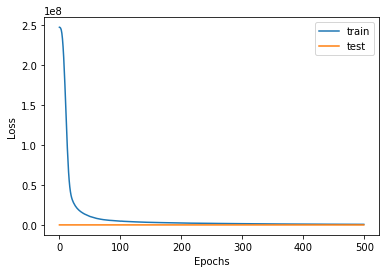

In [45]:
plt.plot(history_dict['loss'])
plt.plot(history_dict['mae'])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [46]:
all_scores

[2148.36865234375,
 1858.3258056640625,
 1895.972412109375,
 2601.04931640625,
 1845.181640625,
 1498.35009765625,
 1759.3348388671875,
 2057.551025390625,
 2096.615966796875]

In [47]:
np.mean(all_scores)

1973.4166395399307

In [48]:
val_mse, val_mae = model.evaluate(carfeatures_test, carprices_test )

2/2 [==============================] - 0s 0s/step - loss: 5414649.5000 - mae: 1668.6117


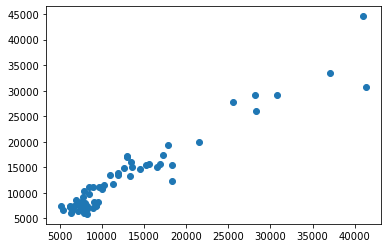

In [50]:
carprice_pred=model.predict(carfeatures_test)

plt.scatter(carprices_test,carprice_pred)